# COURSE: A deep understanding of deep learning
## SECTION: Metaparameters (activation, batch, optimizers)
### LECTURE: The "wine quality" dataset
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [59]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For profiling
import time

# Import and process the data

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


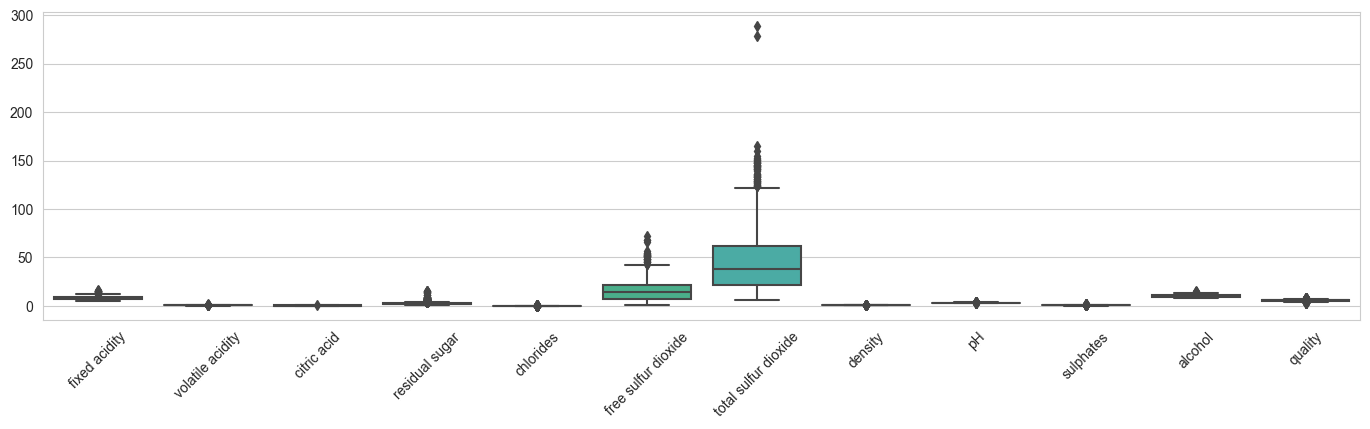

In [5]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


# remove rows with outliers
# data = data[data['total sulfur dioxide']<200]

In [6]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
for col in cols2zscore:
  meanval   = np.mean(data[col])
  stdev     = np.std(data[col],ddof=1)
  data[col] = (data[col]-meanval) / stdev

# can also do more compactly
#data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,3.554936e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


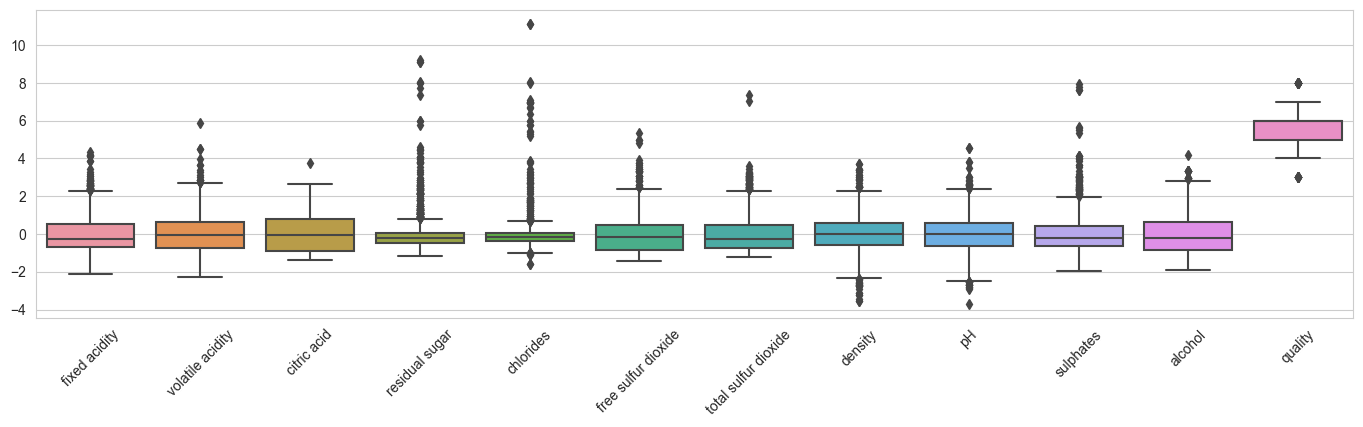

In [7]:
# check the plot again
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

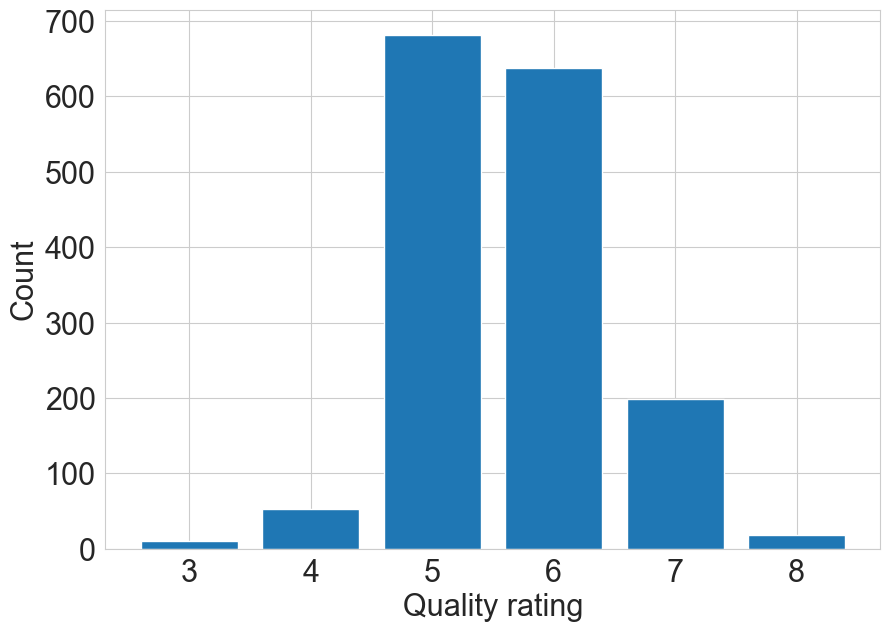

C:\Users\lucan\AppData\Local\Temp\ipykernel_684\310199159.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boolQuality'][data['quality']>5] = 1


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [8]:
# distribution quality values
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]

# Re-organize the data: train/test in DataLoaders

In [33]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()

print( dataT.shape )
print( labels.shape )

# we'll actually need the labels to be a "tensor"
labels = labels[:,None]
print( labels.shape )

torch.Size([1599, 11])
torch.Size([1599])
torch.Size([1599, 1])
tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [1.]])


In [32]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
### THIS IS DONE DYNAMICALLY AS A PARAMETRIC TEST
# batchsize    = 64
# train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
# test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

tensor([[-0.5282,  0.9616, -1.3910,  ...,  1.2882, -0.5790, -0.9599],
        [-0.2985,  1.9668, -1.3910,  ..., -0.7197,  0.1289, -0.5846],
        [-0.2985,  1.2967, -1.1857,  ..., -0.3311, -0.0481, -0.5846],
        ...,
        [-1.1600, -0.0995, -0.7237,  ...,  0.7053,  0.5419,  0.5415],
        [-1.3897,  0.6544, -0.7750,  ...,  1.6769,  0.3059, -0.2092],
        [-1.3323, -1.2165,  1.0217,  ...,  0.5110,  0.0109,  0.5415]])


# CodeChallenge: Minibatch size in the wine dataset

In [114]:
def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
    nn.Linear(11,32),   # input layer
    nn.ReLU(),         # activation unit
    nn.Linear(32,64),  # hidden layer
    nn.ReLU(),         # activation unit
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation unit
    nn.Linear(64,1),   # output units
    # nn.Sigmoid()      # NOT REQUIRED DUE TO LOSS FUNCTION IMPLEMENTING IT
  )

  # loss function
  lossfun = nn.BCEWithLogitsLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [115]:
# global parameter
numepochs = 1000

# Does not change, so only compute once.
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

def trainTheModel(ANNiris, lossfun, optimizer, train_loader):

  # initialize accuracies as empties
  trainAcc = []
  testAcc  = []
  losses   = []

  # loop over epochs
  for epochi in range(numepochs):
    ANNiris.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean(((yHat > 0 ) == y.bool()).float()).item() )
      batchLoss.append( loss.item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )
    losses.append( np.mean(batchLoss) )

    # test accuracy
    ANNiris.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad():         # Dont comupte gradients (no backprop, saves time)
      predlabels = ANNiris(X)
    testAcc.append( 100*torch.mean(((predlabels > 0 ) == y.bool()).float()).item() )

  # function output
  return trainAcc,testAcc,losses


# Single run

Training took 20.2s


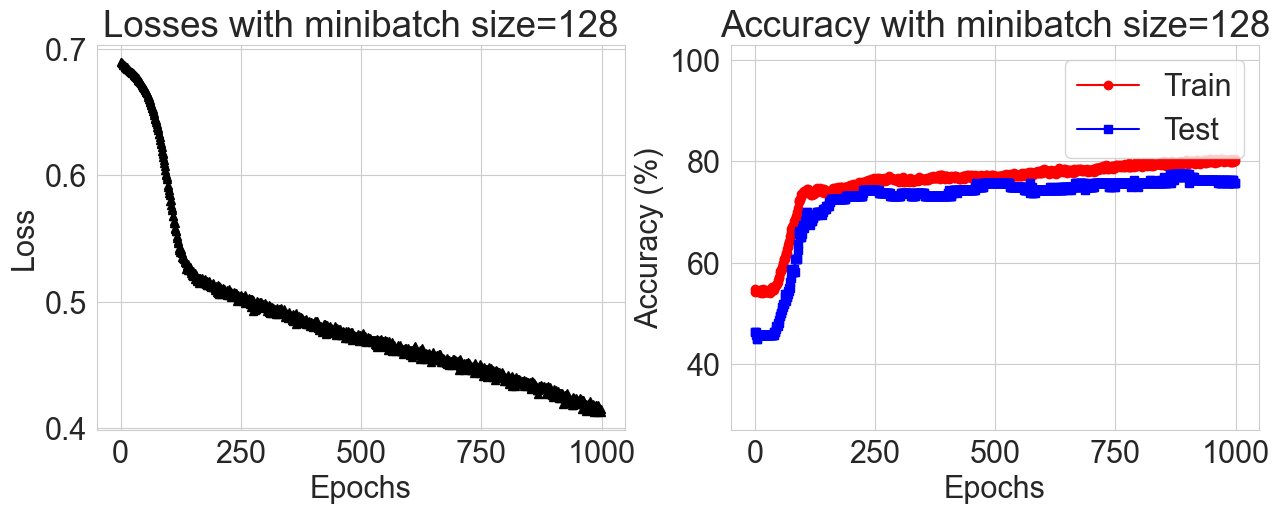

In [116]:
# Load data with specific batch size
train_loader = DataLoader(train_data, batch_size=128, shuffle=True, drop_last=True)

# Create and run model!
start = time.perf_counter()
ANNiris,lossfun,optimizer = createANewModel()
trainAcc,testAcc,losses = trainTheModel(ANNiris, lossfun, optimizer, train_loader)
end = time.perf_counter()
print(f"Training took {end - start:.1f}s")

# Plot results
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with minibatch size=128')

ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_title('Accuracy with minibatch size=128')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27,103])

plt.show()

# Parametric test

In [96]:
batch_sizes = 2**np.arange(1,11, 2)

all_train_acc = []
all_test_acc = []
all_losses = []
training_times = []

for bs in batch_sizes:
  start = time.perf_counter()
  print(f"Training with batch size {bs}...")

  # Load data with specific batch size
  train_loader = DataLoader(train_data, batch_size=int(bs), shuffle=True, drop_last=True)

  # Create and run model!
  ANNiris,lossfun,optimizer = createANewModel()
  trainAcc,testAcc,losses = trainTheModel(ANNiris, lossfun, optimizer, train_loader)

  all_train_acc.append(trainAcc)
  all_test_acc.append(testAcc)
  all_losses.append(losses)

  training_time = time.perf_counter() - start
  training_times.append(training_time)
  print(f"Training took {training_time:.1f}s")

Training with batch size 2...
Training took 621.3s
Training with batch size 8...
Training took 192.9s
Training with batch size 32...
Training took 73.2s
Training with batch size 128...
Training took 35.3s
Training with batch size 512...
Training took 19.5s


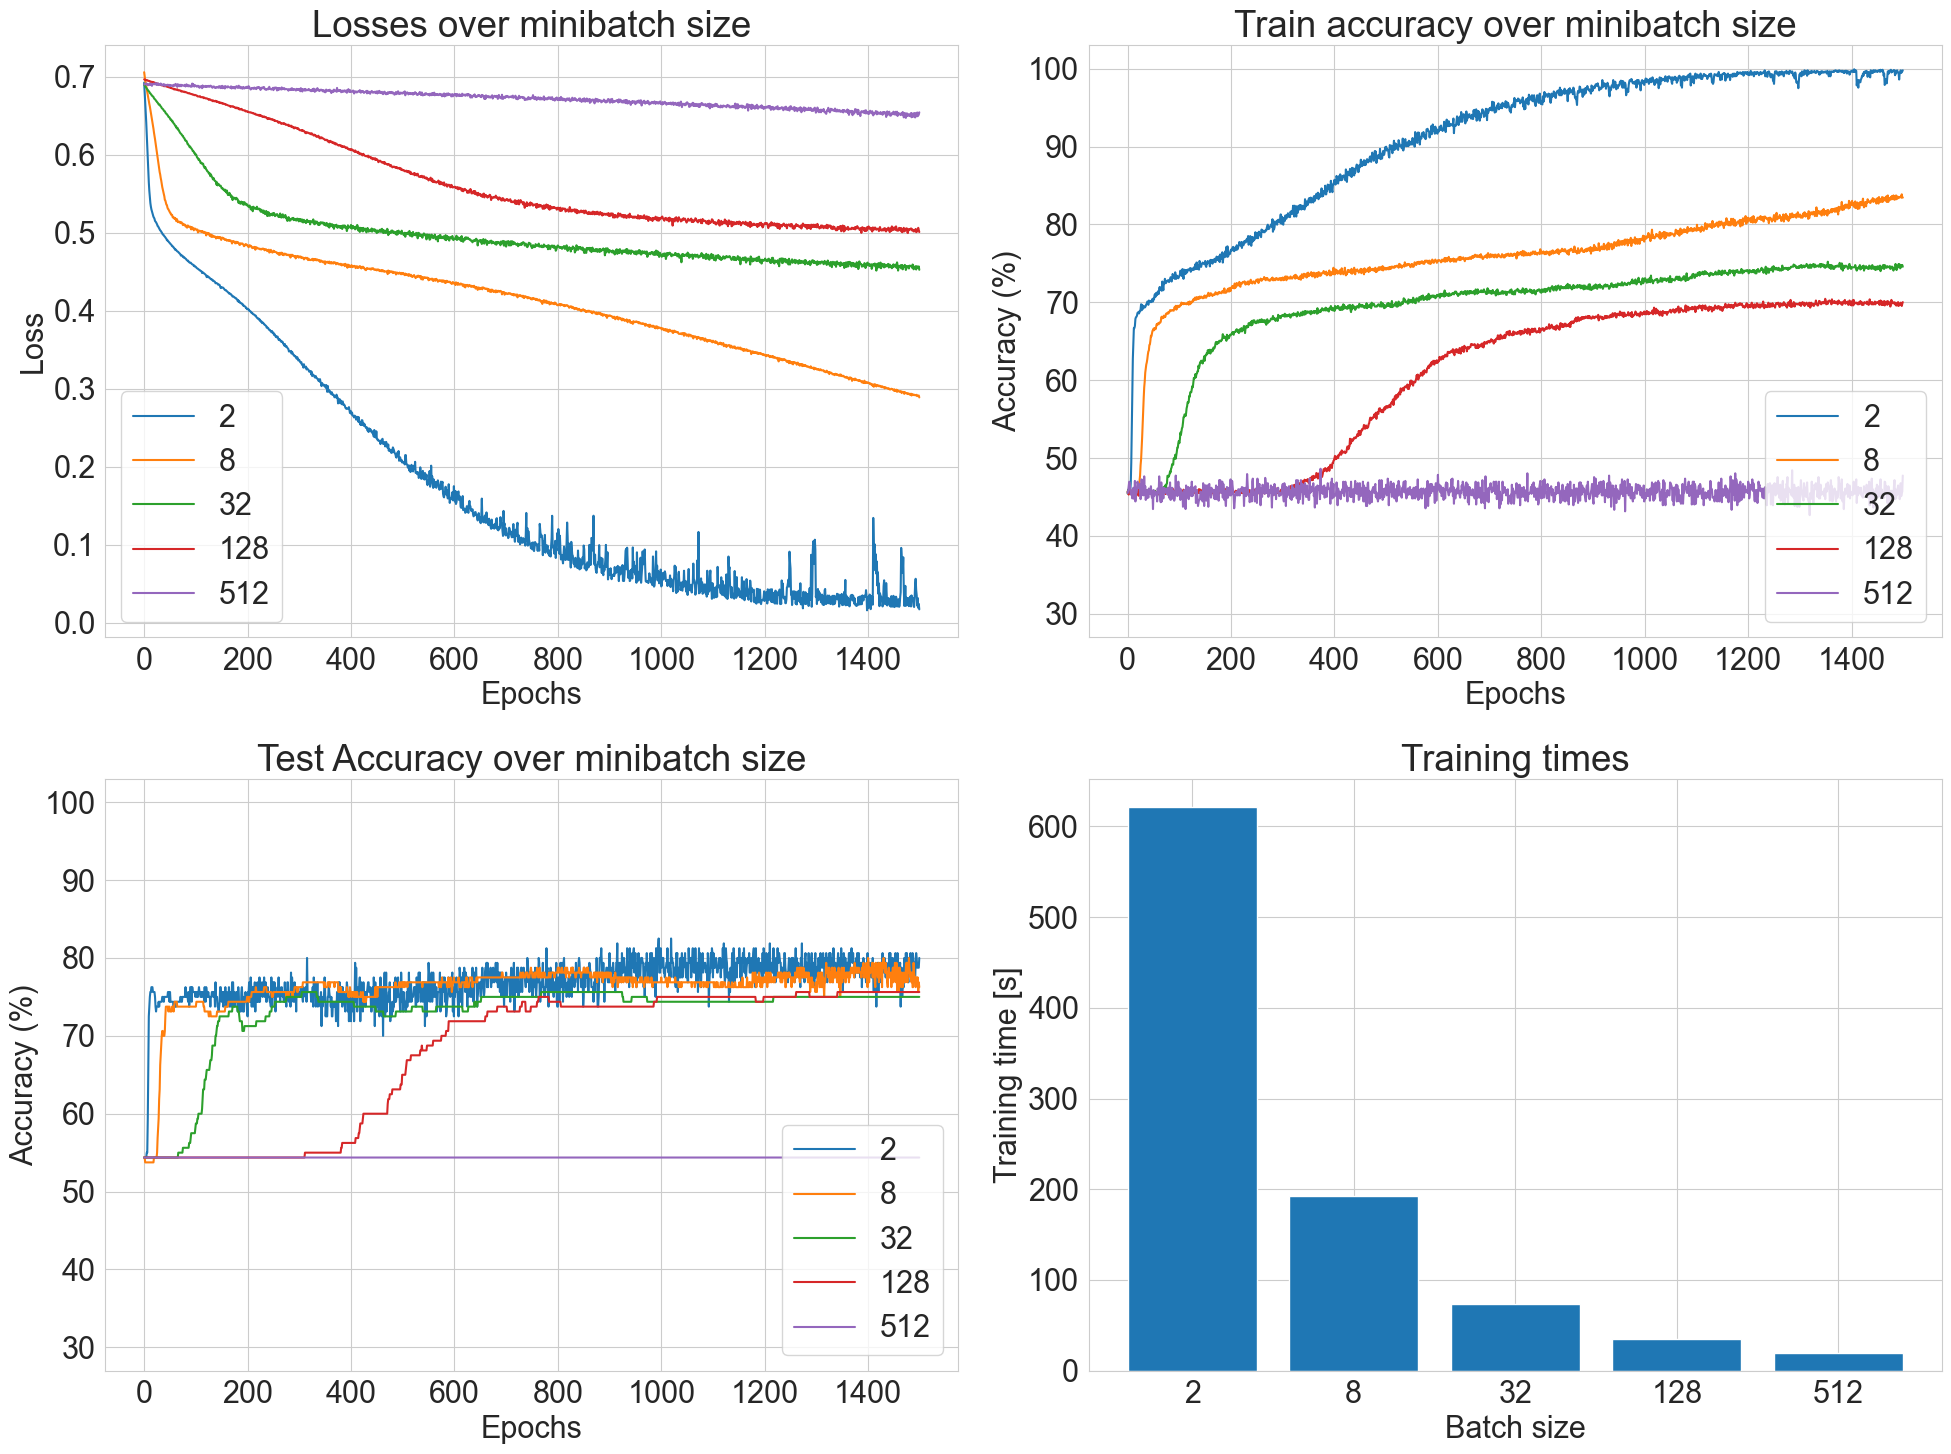

In [98]:
# plot the results
fig,ax = plt.subplots(2,2, figsize=(20,15))
ax = ax.flatten()

ax[0].plot(np.transpose(all_losses), label=batch_sizes)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses over minibatch size')
ax[0].legend()

ax[1].plot(np.transpose(all_train_acc), label=batch_sizes)
ax[1].set_title('Train accuracy over minibatch size')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27,103])
ax[1].legend()

ax[2].plot(np.transpose(all_test_acc), label=batch_sizes)
ax[2].set_title('Test Accuracy over minibatch size')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Accuracy (%)')
ax[2].legend(['Train','Test'])
ax[2].set_ylim([27,103])
ax[2].legend()

ax[3].bar(range(len(training_times)), training_times)
ax[3].set_title("Training times")
ax[3].set_ylabel("Training time [s]")
ax[3].set_xlabel("Batch size")
ax[3].set_xticks(range(len(training_times)), batch_sizes)

plt.tight_layout()
plt.show()